# Analysis of the parameters

Analise the paremeters found with the iterative approach in the 0hours region of DR2.

In [1]:
from glob import glob
import pickle
import os
import sys
import numpy as np
from astropy.table import Table

In [2]:
try:
    BASEPATH = os.path.dirname(os.path.realpath(__file__))
    data_path = os.path.join(BASEPATH, "..", "..", "data")
except NameError:
    if os.path.exists("data"):
        BASEPATH = "."
        data_path = os.path.join(BASEPATH, "data")
    else:
        BASEPATH = os.getcwd()
        data_path = os.path.join(BASEPATH, "..", "..", "data")

In [3]:
sys.path.append(os.path.join(BASEPATH, '..', '..', 'src'))

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
idp = os.path.join(BASEPATH, "..", "..", "data", "idata", "params")

## Load the data

In [6]:
#combined_all = Table.read(os.path.join(data_path, "samples", "test_combined.fits"))

In [7]:
param_list = sorted(glob(os.path.join(idp, "lofar_params*.pckl")))

In [8]:
params = [pickle.load(open(p, "rb")) for p in param_list]

In [9]:
# bin_list, centers, Q_0_colour, n_m, q_m

In [10]:
lofar_table_list = sorted(glob(os.path.join(idp, "lofar_m*.fits")))

In [11]:
lofar = Table.read(lofar_table_list[-1])

## Analysis

### Number of sources changed

In [12]:
for i in range(1, 7):
    n_changes = np.sum((lofar["lr_index_sel_{}".format(i+1)] != lofar["lr_index_{}".format(i)]) & 
                   ~np.isnan(lofar["lr_index_sel_{}".format(i+1)]) &
                   ~np.isnan(lofar["lr_index_{}".format(i)]))
    print(f"Changes from {i} to {i+1}: {n_changes}")

Changes from 1 to 2: 3135
Changes from 2 to 3: 139
Changes from 3 to 4: 20
Changes from 4 to 5: 8
Changes from 5 to 6: 3
Changes from 6 to 7: 0


### Plot of the q(m,c) over n(m,c)

In [14]:
from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.lines import Line2D

In [15]:
bin_list, centers, Q_0_colour, n_m, q_m = params[-1]

In [16]:
Q_0_colour

array([0.00772401, 0.12601914, 0.00148692, 0.00587783, 0.04278144,
       0.06475596, 0.05079485, 0.05203229, 0.06675182, 0.0828984 ,
       0.10428413, 0.21186145])

In [17]:
len(n_m)

12

In [18]:
plt.rcParams["figure.figsize"] = (6.64*1.2, 6.64*0.74)
plt.rcParams["figure.dpi"] = 300
plt.rcParams['lines.linewidth'] = 1.75
plt.rcParams['lines.markersize'] = 8.0
plt.rcParams['lines.markeredgewidth'] = 0.75
plt.rcParams['font.size'] = 15.0 ## not 18.0
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "CM"
plt.rcParams['xtick.labelsize'] = 'small'
plt.rcParams['ytick.labelsize'] = 'small'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.labelspacing'] = 0.4
plt.rcParams['legend.frameon'] = False
plt.rcParams['text.usetex'] = True
plt.rcParams['savefig.dpi'] = 300

Text(0, 0.5, '$q(m)/n(m)$')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


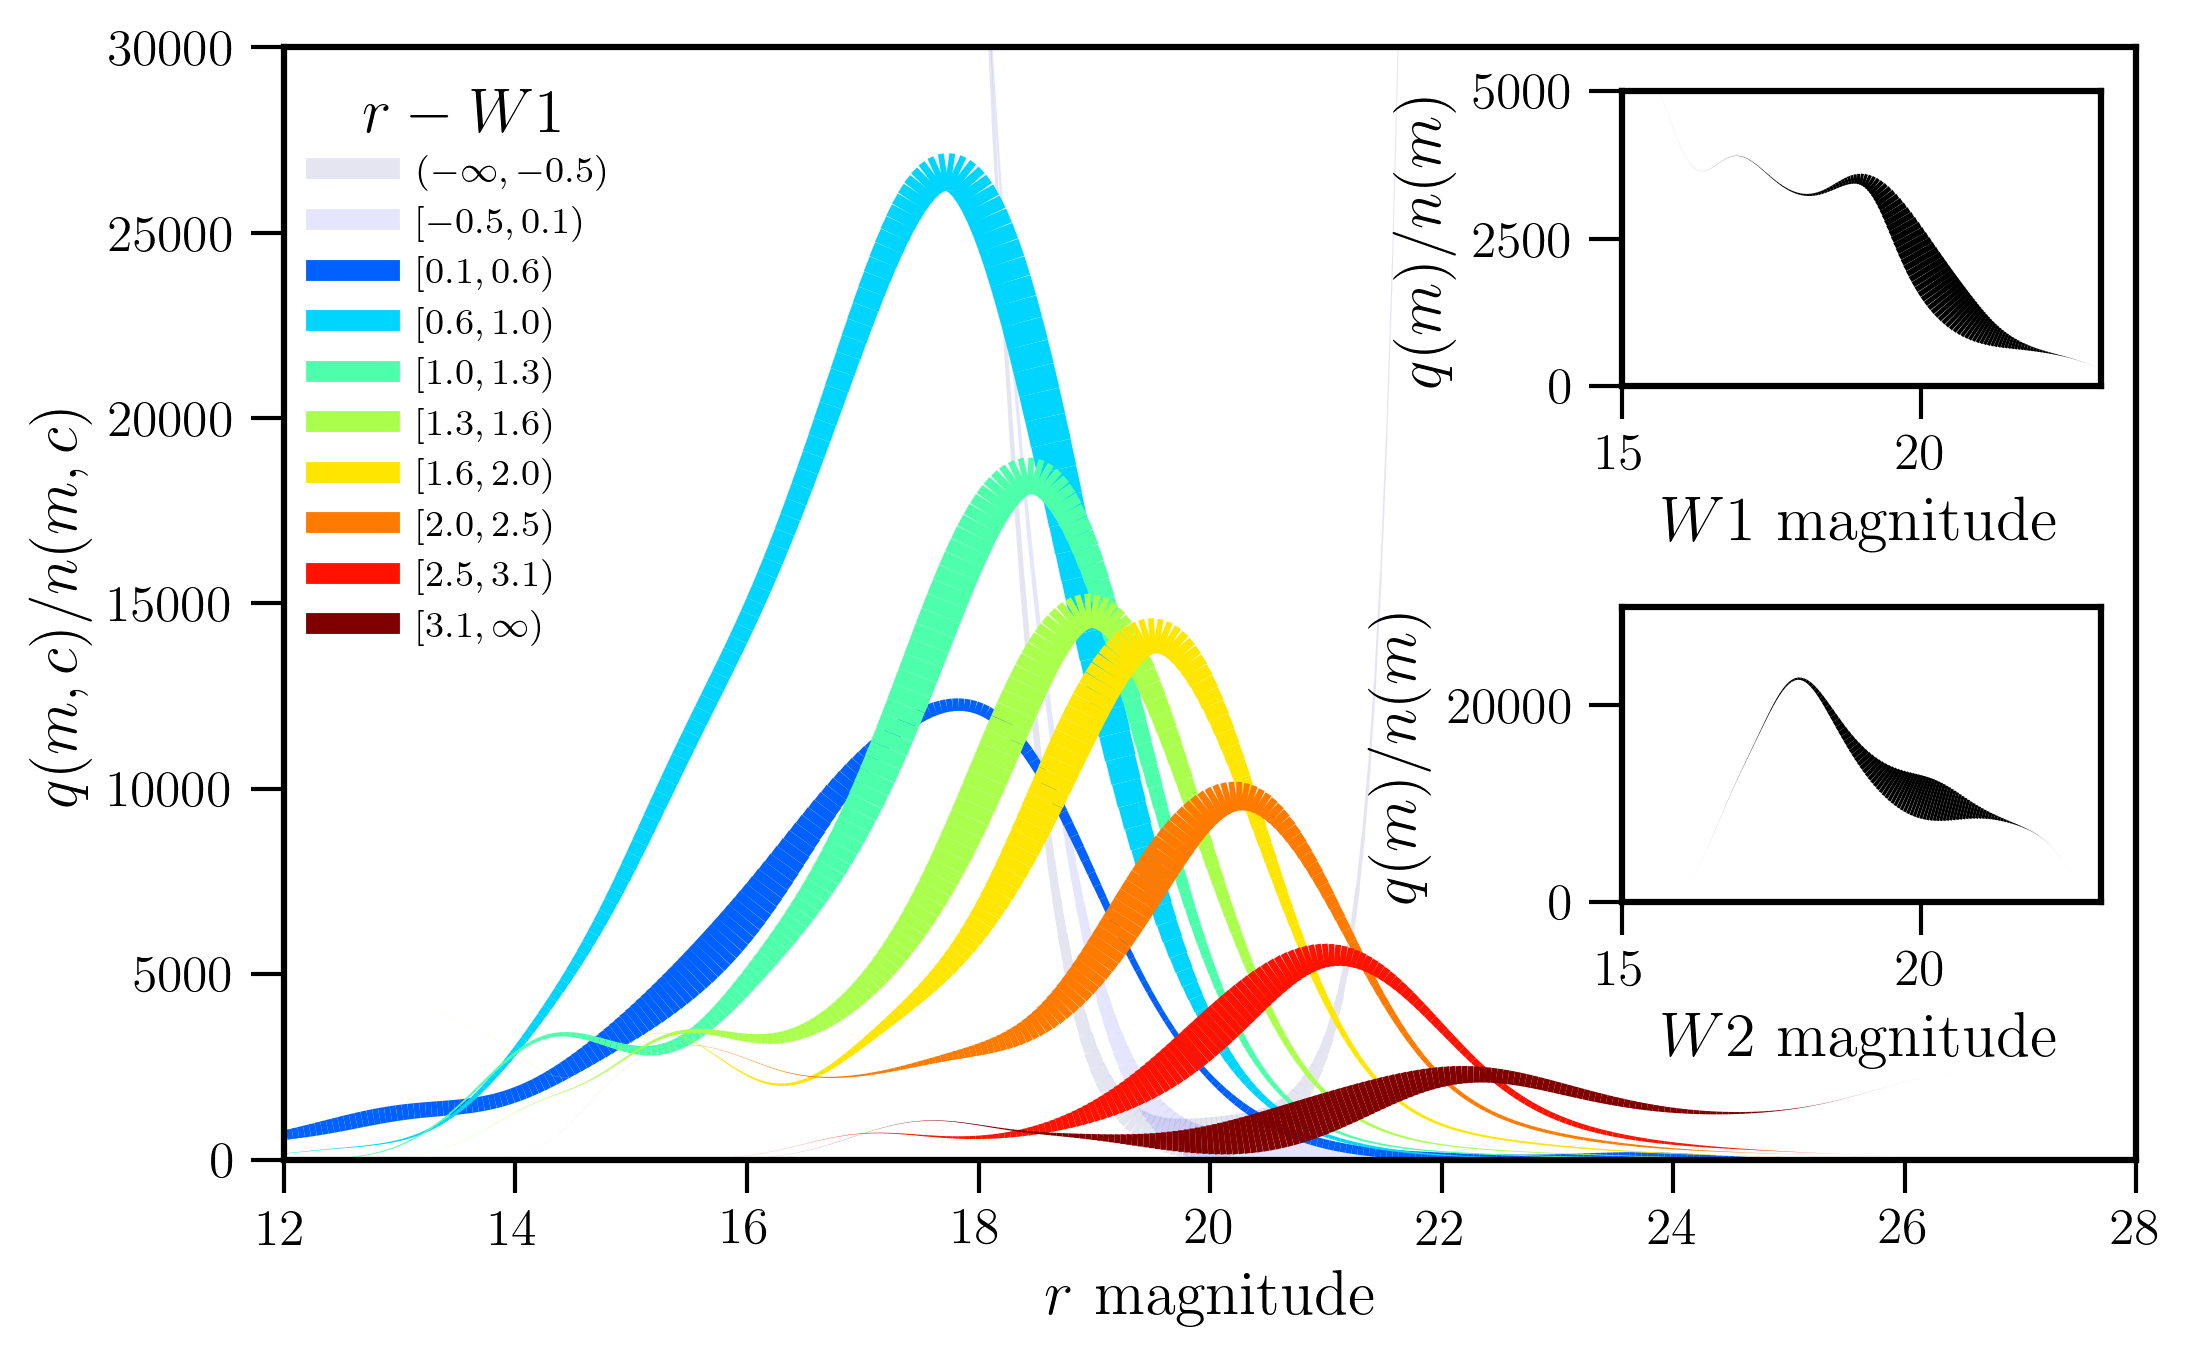

In [19]:
low = np.nonzero(centers[1] >= 15)[0][0]
high = np.nonzero(centers[1] >= 22.2)[0][0]

cm_subsection = np.linspace(0., 1., len(q_m)-2) 
colors = [ cm.jet(x) for x in cm_subsection ]

alphas = [0.1, 0.1, 1, 1, 1, 1, 1, 1, 1, 1]

fig, a = plt.subplots()
lcs = []
proxies = []

def make_proxy(zvalue, scalar_mappable, **kwargs):
    color = scalar_mappable.cmap(scalar_mappable.norm(zvalue))
    return Line2D([0, 1], [0, 1], color=color, **kwargs)

for i, q_m_k in enumerate(q_m[2:]):
    #plot(centers[i], q_m_old[i]/n_m_old[i])
    q_m_aux = q_m[i]/np.sum(q_m[i])
    lwidths = (q_m_aux/np.max(q_m_aux)*10).astype(float)
    #if save_pdf and (i<6): # Solve problems with the line with in pdfs
    #    lwidths[lwidths < 0.005] = 0
    #print(lwidths)

    y_aux = q_m_k/n_m[i]
    factor = np.max(y_aux[low:high])
    y = y_aux
    #print(y)
    x = centers[i]

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    #lc = LineCollection(segments, linewidths=lwidths, color=colors[i])
    if i not in [-1]:
        color = colors[i]

        lcs.append(LineCollection(segments, linewidths=lwidths, color=color, alpha=alphas[i]))
        proxies.append(Line2D([0, 1], [0, 1], color=color, lw=5, alpha=alphas[i]))

        a.add_collection(lcs[-1])
        plt.xlim([12, 28])
        plt.ylim([0, 30000])
        plt.xlabel("$r$ magnitude")
        plt.ylabel("$q(m,c)/n(m,c)$")

a.legend(proxies, 
         [
   "$(-\infty, -0.5)$", 
   "$[-0.5, 0.1)$",
   "$[0.1, 0.6)$",
   "$[0.6, 1.0)$",
   "$[1.0, 1.3)$",
   "$[1.3, 1.6)$",
   "$[1.6, 2.0)$",
   "$[2.0, 2.5)$",
   "$[2.5, 3.1)$",
   "$[3.1, \infty)$"
    ],
        fontsize="xx-small",
        title="$r-W1$",
        loc=2)
        
inset = plt.axes([0.685, 0.3, .2, .2])
q_m_aux = q_m[0]/np.sum(q_m[0])
lwidths = (q_m_aux/np.max(q_m_aux)*10).astype(float)
y_aux = q_m[0]/n_m[0]
factor = np.max(y_aux[low:high])
y = y_aux
x = centers[0]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, linewidths=lwidths, color="k")
proxy = Line2D([0, 1], [0, 1], color="k", lw=5)
inset.add_collection(lc)
plt.xlim([15, 23])
plt.ylim([0, 30000])
plt.xlabel("$W2$ magnitude")
plt.ylabel("$q(m)/n(m)$")

inset2 = plt.axes([0.685, 0.65, .2, .2])
q_m_aux = q_m[1]/np.sum(q_m[1])
lwidths = (q_m_aux/np.max(q_m_aux)*10).astype(float)
y_aux = q_m[1]/n_m[1]
factor = np.max(y_aux[low:high])
y = y_aux
x = centers[1]
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, linewidths=lwidths, color="k")
proxy = Line2D([0, 1], [0, 1], color="k", lw=5)
inset2.add_collection(lc)
plt.xlim([15, 23])
plt.ylim([0, 5000])
plt.xlabel("$W1$ magnitude")
plt.ylabel("$q(m)/n(m)$")

### Compute completeness and reliability

In [20]:
q0 = np.sum(Q_0_colour)

In [21]:
def completeness(lr, threshold, q0):
    n = len(lr)
    lrt = lr[lr < threshold]
    return 1. - np.sum((q0 * lrt)/(q0 * lrt + (1 - q0)))/float(n)/q0

def reliability(lr, threshold, q0):
    n = len(lr)
    lrt = lr[lr > threshold]
    return 1. - np.sum((1. - q0)/(q0 * lrt + (1 - q0)))/float(n)/q0

completeness_v = np.vectorize(completeness, excluded=[0])
reliability_v = np.vectorize(reliability, excluded=[0])

In [27]:
lr = lofar['lr_7']

In [28]:
n_test = 100
threshold_mean = np.percentile(lr, 100*(1 - q0))


In [29]:
thresholds = np.arange(0., 10., 0.01)

In [30]:
completeness_t = completeness_v(lr, thresholds, q0)
reliability_t = reliability_v(lr, thresholds, q0)
average_t = (completeness_t + reliability_t)/2

In [36]:
print(thresholds[np.argmin(np.abs(completeness_t-reliability_t))])

0.38


In [47]:
thresholds_fine = np.arange(0., 2., 0.001)

In [48]:
completeness_t_fine = completeness_v(lr, thresholds_fine, q0)
reliability_t_fine = reliability_v(lr, thresholds_fine, q0)
average_t_fine = (completeness_t_fine + reliability_t_fine)/2

In [49]:
sel_threshold = thresholds_fine[np.argmin(np.abs(completeness_t_fine-reliability_t_fine))]

In [50]:
print(sel_threshold)

0.383


In [51]:
n_above_threshold = np.sum(lr >= sel_threshold)
n_total = len(lr)
print("{} of {} ({:.1%})".format(n_above_threshold, n_total, n_above_threshold/n_total))

80560 of 100207 (80.4%)


In [52]:
loc = np.argmin(np.abs(completeness_t_fine-reliability_t_fine))
print(completeness_t_fine[loc], reliability_t_fine[loc])

0.9769501659315227 0.9769945419367062


### Plot completness and reliability

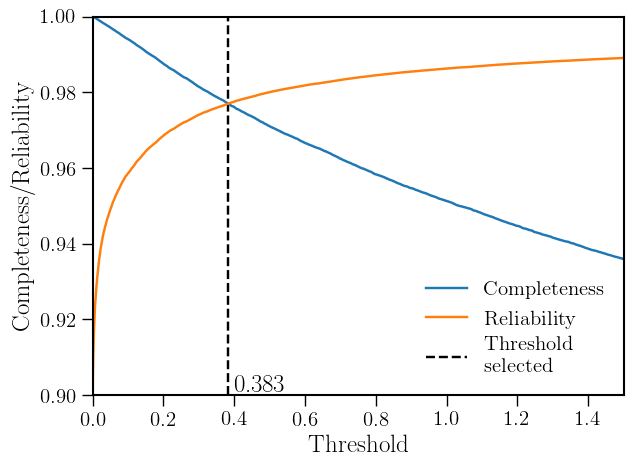

In [55]:
plt.rcParams["figure.figsize"] = (6.64, 6.64*0.74)
plt.rcParams["figure.dpi"] = 100
plt.rcParams['lines.linewidth'] = 1.75
plt.rcParams['lines.markersize'] = 8.0
plt.rcParams['lines.markeredgewidth'] = 0.75
plt.rcParams['font.size'] = 18.0
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "CM"
plt.rcParams['xtick.labelsize'] = 'small'
plt.rcParams['ytick.labelsize'] = 'small'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.labelspacing'] = 0.4
plt.rcParams['legend.frameon'] = False
plt.rcParams['text.usetex'] = True
plt.rcParams['savefig.dpi'] = 300

plt.plot(thresholds_fine, completeness_t_fine, "-", label="Completeness")
plt.plot(thresholds_fine, reliability_t_fine, "-", label="Reliability")
plt.text(0.4, 0.901, "{:.3f}".format(sel_threshold))
#plot(thresholds_fine, average_t_fine, "-", label="average")
plt.vlines(sel_threshold, 0.9, 1., "k", linestyles="dashed", label="Threshold\nselected")
#vlines(threshold_mean, 0.9, 1., "y", linestyles="dashed")
plt.ylim([0.90, 1.])
plt.xlim([0.0, 1.5])
plt.legend(loc=4)
plt.xlabel("Threshold")
plt.ylabel("Completeness/Reliability")

# subplots_adjust(left=0.2, 
#                 bottom=0.1, 
#                 right=0.95, 
#                 top=0.9,
#                 wspace=0.4, 
#                 hspace=0.2)
plt.subplots_adjust(left=0.15, 
                bottom=0.15, 
                right=0.95, 
                top=0.92,
                wspace=0.4, 
                hspace=0.2)

In [58]:
cat, counts = np.unique(lofar['category'][lr >= sel_threshold], return_counts=True)

In [61]:
n_total

100207

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

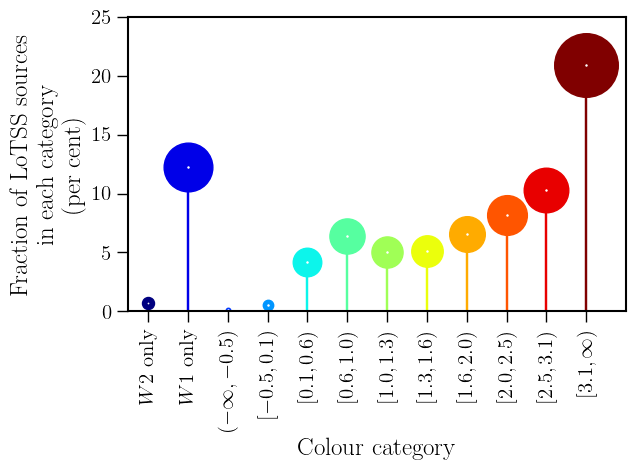

In [71]:
plt.rcParams["figure.figsize"] = (6.64, 6.64*0.74)
plt.rcParams["figure.dpi"] = 100
plt.rcParams['lines.linewidth'] = 1.75
plt.rcParams['lines.markersize'] = 8.0
plt.rcParams['lines.markeredgewidth'] = 0.75
plt.rcParams['font.size'] = 18.0
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "CM"
plt.rcParams['xtick.labelsize'] = 'small'
plt.rcParams['ytick.labelsize'] = 'small'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.labelspacing'] = 0.4
plt.rcParams['legend.frameon'] = False
plt.rcParams['text.usetex'] = True
plt.rcParams['savefig.dpi'] = 300

cm_subsection = np.linspace(0., 1., len(cat)) 
colors = [ cm.jet(x) for x in cm_subsection ]

# colours
for i in range(len(cat)):
    plt.plot([i,i], [0, counts[i]/n_total*100], marker=",", ls="-", color=colors[i])
    plt.scatter([i], counts[i]/n_total*100, s=counts[i]/10, c=colors[i])
    if i == 0:
        plt.plot([i], counts[i]/n_total*100, marker=".", ls="", color="w", ms=1)
    else:
        plt.plot([i], counts[i]/n_total*100, marker=".", ls="", color="w", ms=2)

#text(0.66, 0.971, "0.639")
plt.xlim([-0.5, 12.])
#legend(fontsize="small")
plt.xlabel("Colour category")
plt.ylabel("Fraction of LoTSS sources\nin each category\n(per cent)")


xt = ["$W2$ only",
      "$W1$ only",
       "$(-\infty, -0.5)$", 
   "$[-0.5, 0.1)$",
   "$[0.1, 0.6)$",
   "$[0.6, 1.0)$",
   "$[1.0, 1.3)$",
   "$[1.3, 1.6)$",
   "$[1.6, 2.0)$",
   "$[2.0, 2.5)$",
   "$[2.5, 3.1)$",
   "$[3.1, \infty)$"]
plt.xticks(np.arange(len(xt)), xt, rotation=90)
plt.ylim([0., 25.])

plt.subplots_adjust(left=0.2, 
                bottom=0.3, 
                right=0.95, 
                top=0.9,
                wspace=0.4, 
                hspace=0.2)